In [19]:
from IPython.core.display import HTML
HTML(r"""
<style>
    * {
        #color: red;
        #font-family: ‘Cascadia Code PL’;#,‘Courier New’, Courier, monospace; 
        font-family: ‘Courier New’, Courier, monospace; 
        font-size: 20px !important;
        line-height: 1.1 !important;
    }
    .output-plaintext, .output-stream, .output {
        font-family: ‘Courier New’, Courier, monospace; # Any monospaced font should work
        line-height: 1.3 !important;
        font-size: 20px !important;
    }
</style>
""")

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [2]:
df_train = pd.read_csv('./data/train.csv')

In [3]:
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
df_train.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [6]:
df_train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [7]:
df_train.keyword.unique()

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'der

In [8]:
len(df_train.keyword.unique())

222

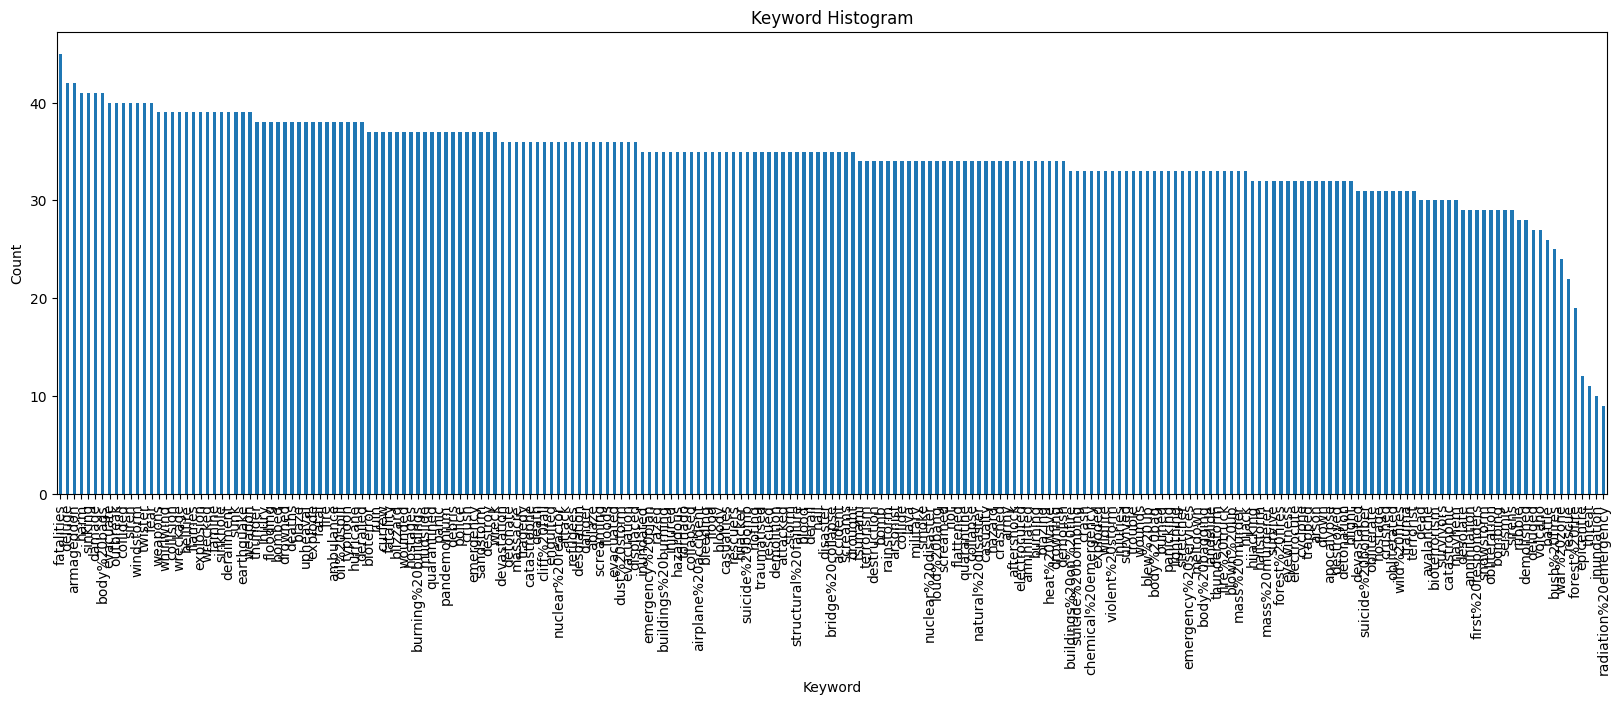

In [9]:
keyword_counts = df_train['keyword'].value_counts()

# Plot the histogram
plt.figure(figsize=(20, 6))
keyword_counts.plot(kind='bar')
plt.xlabel('Keyword')
plt.ylabel('Count')
plt.title('Keyword Histogram')
plt.show()

### Keywords vs targets correlation
I want to explore if there is a correlation between keywords and targets.

In [10]:
keyword_target_counts = df_train.groupby(['keyword', 'target']).size().unstack().fillna(0)

shuffled_counts = keyword_target_counts.sample(frac=1, random_state=42)
shuffled_counts[:20]

target,0,1
keyword,,
injury,27.0,11.0
nuclear%20reactor,22.0,14.0
engulfed,17.0,19.0
smoke,31.0,3.0
battle,21.0,5.0
forest%20fire,4.0,15.0
screamed,30.0,4.0
war%20zone,17.0,7.0
destruction,28.0,6.0


<AxesSubplot:xlabel='keyword'>

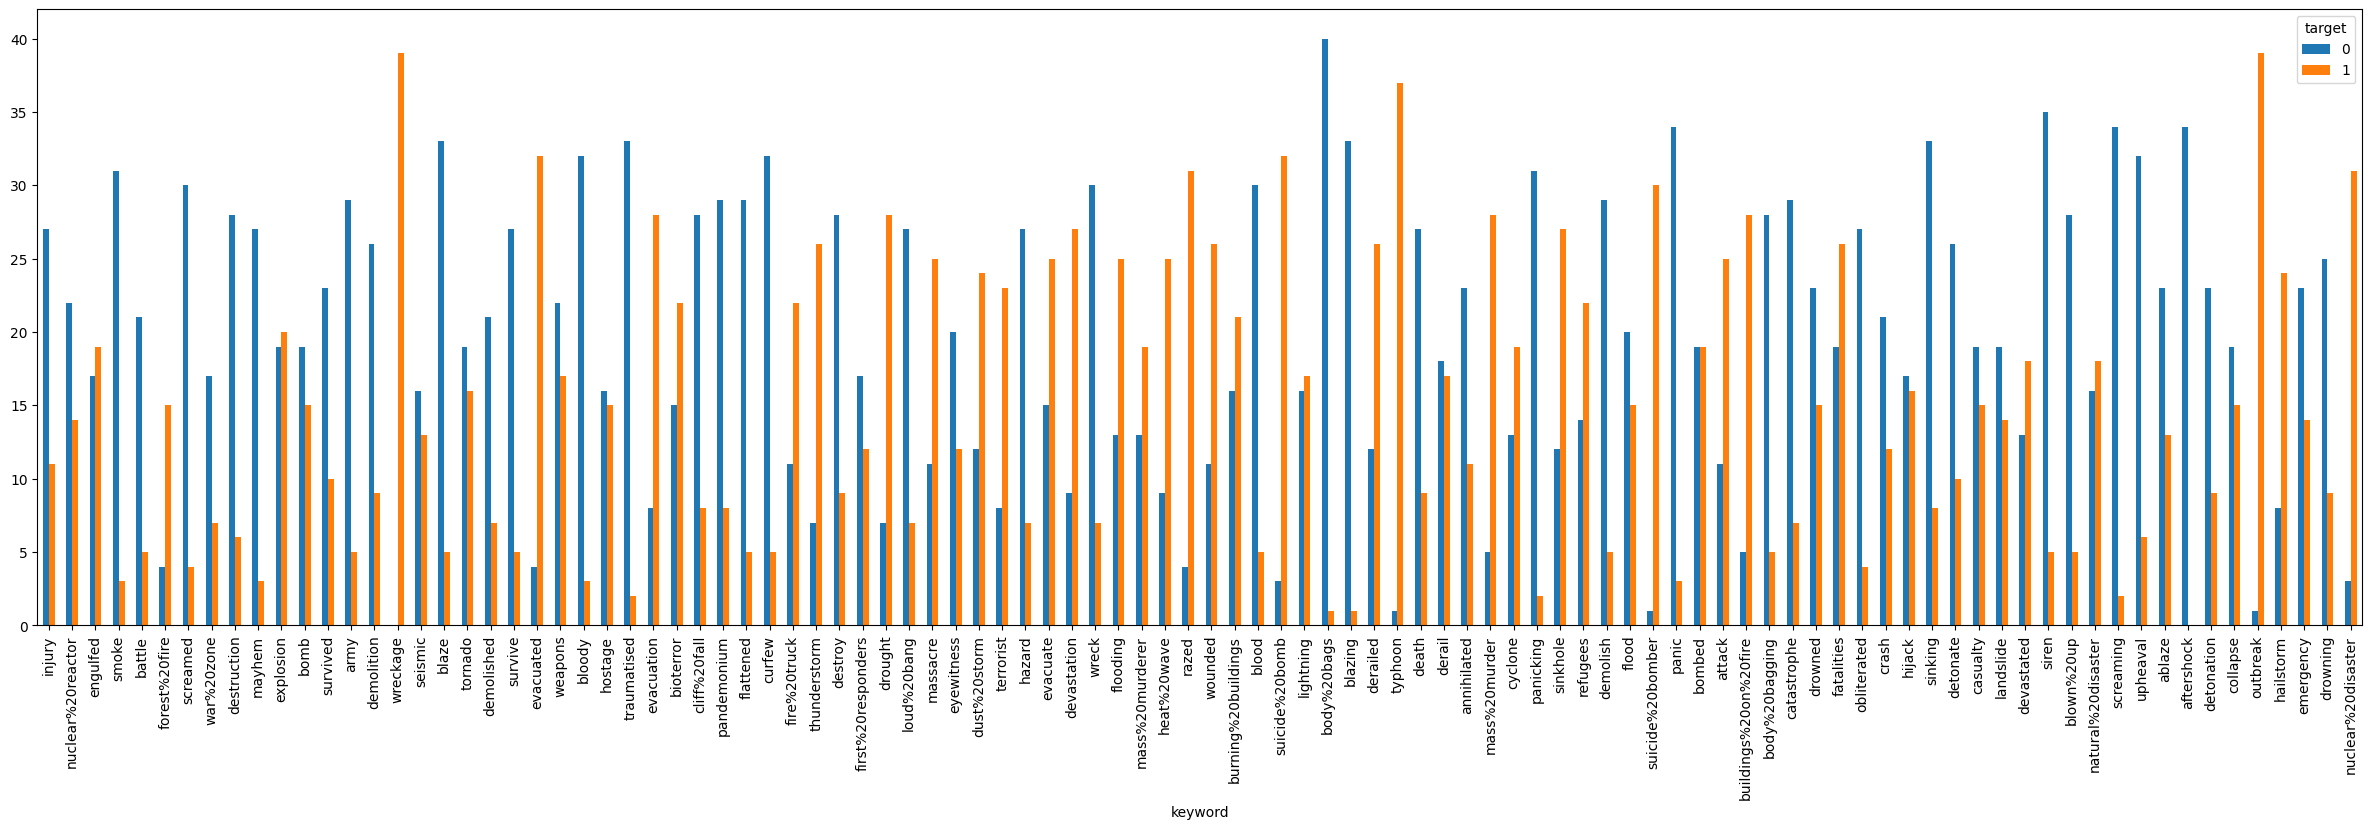

In [11]:
fig, ax = plt.subplots(figsize=(30, 8))
shuffled_counts[:100].plot(kind='bar', stacked=False, ax=ax)
# plt.xlabel('Keyword')
# plt.ylabel('Count')
# plt.title('Keyword vs Target Counts')
# plt.legend(title='Target')
# plt.show()

In [12]:
df_train.location.unique()

array([nan, 'Birmingham', 'Est. September 2012 - Bristol', ...,
       'Vancouver, Canada', 'London ', 'Lincoln'], dtype=object)

In [13]:
len(df_train.location.unique())

3342

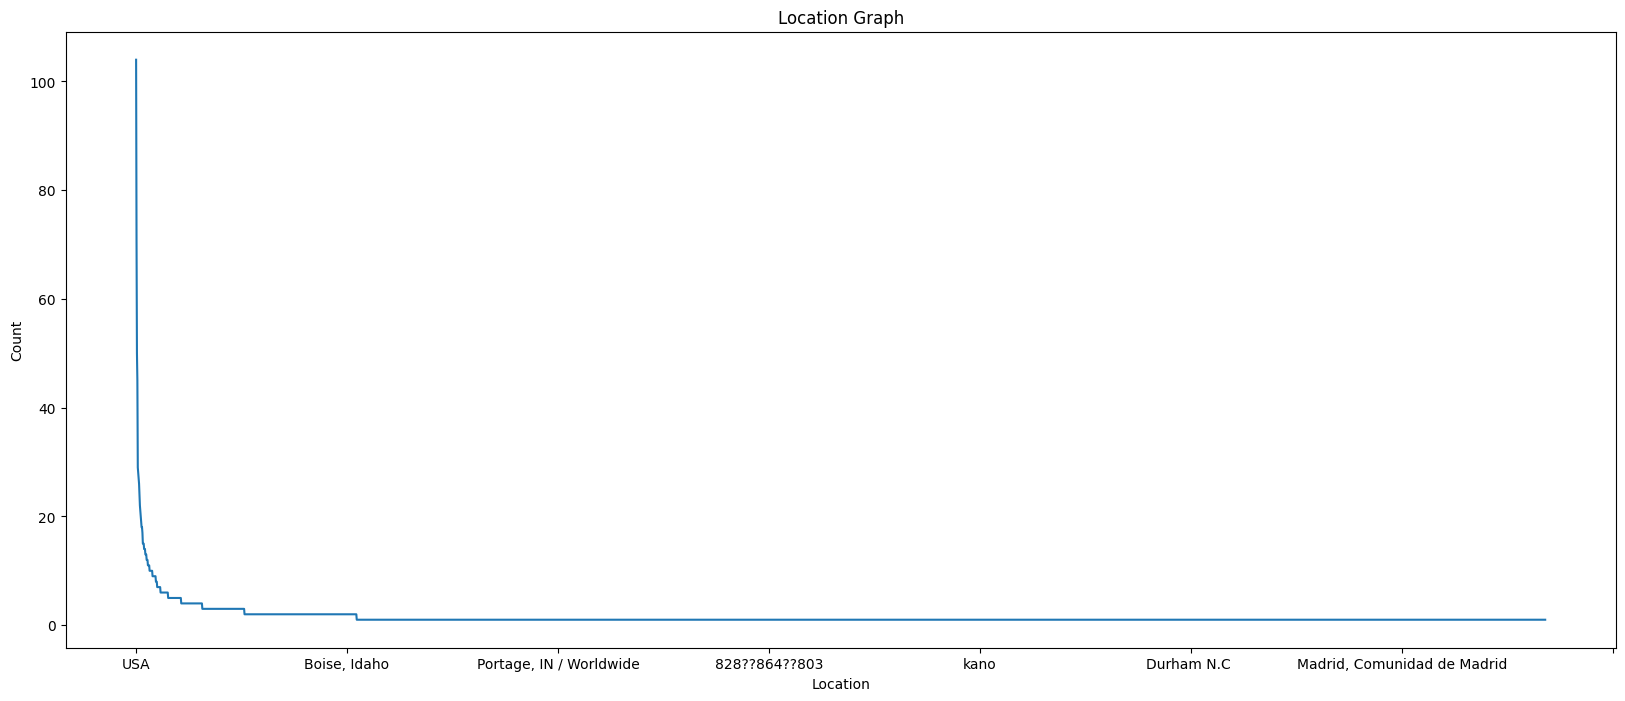

In [14]:
location_counts = df_train['location'].value_counts()

# Plot the histogram
plt.figure(figsize=(20, 8))
location_counts.plot(kind='line')
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Location Graph')
plt.show()

In [15]:
df_train.location.mode()

0    USA
dtype: object

In [16]:
location_counts[:20].sort_values(ascending=False)

USA                104
New York            71
United States       50
London              45
Canada              29
Nigeria             28
UK                  27
Los Angeles, CA     26
India               24
Mumbai              22
Washington, DC      21
Kenya               20
Worldwide           19
Australia           18
Chicago, IL         18
California          17
California, USA     15
New York, NY        15
Everywhere          15
San Francisco       14
Name: location, dtype: int64

### Location vs Target
Since the locations are not evenly distrubuted. So, I prefer to discard locations in this case study. I believe it's screwed towards USA. If the location data is evenly distributed, I can do good correlation analysis to find out which areas have more disasters. It is not the case in this. So, I would not use location to predict.

### Tweet Length vs Target
I want to find out if the tweets are longer or shorter for each target.

In [17]:
df_train['tweet_length'] = df_train['text'].apply(lambda x: len(x))

In [18]:
df_train.groupby('target')['tweet_length'].mean()

target
0     95.706817
1    108.113421
Name: tweet_length, dtype: float64

<AxesSubplot:>

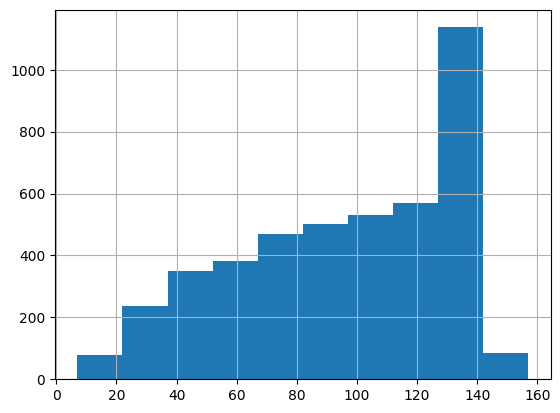

In [19]:
df_train[df_train['target'] == 0]['tweet_length'].hist()

<AxesSubplot:>

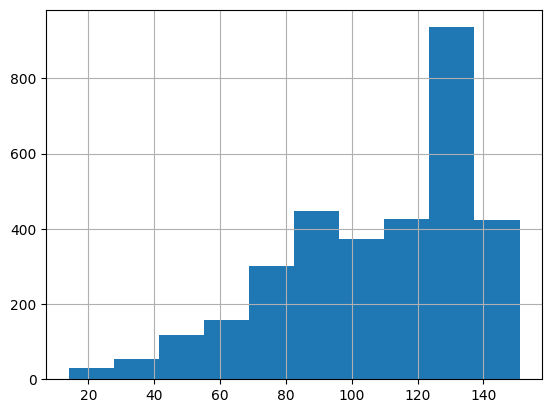

In [20]:
df_train[df_train['target'] == 1]['tweet_length'].hist()

According to this, I don't see any correlation between tweet lengths and tweet being disaster or not.

In [21]:
import re

def remove_urls(text):
    url_pattern = re.compile(r"http[s]?://\S+|www\.\S+")

    text = re.sub(url_pattern, "", text)
  
    return text

In [22]:
import nltk
from nltk.corpus import stopwords

# Download the stopwords corpus if not already downloaded
nltk.download('stopwords')

# Get the list of stopwords
stop_words = set(stopwords.words('english'))

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
[nltk_data] Downloading package stopwords to /home/light/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Clean tweets by urls

In [23]:
df_train['clean_text'] = df_train['text'].apply(lambda x: remove_urls(x))

In [24]:
non_disaster_tweets = df_train[df_train['target'] == 0]['clean_text']
disaster_tweets = df_train[df_train['target'] == 1]['clean_text']

non_disaster_words = [word.lower() for tweet in non_disaster_tweets for word in nltk.word_tokenize(tweet) if word not in stop_words]
disaster_words = [word.lower() for tweet in disaster_tweets for word in nltk.word_tokenize(tweet) if word not in stop_words]

non_disaster_bigrams = list(nltk.bigrams(non_disaster_words))
disaster_bigrams = list(nltk.bigrams(disaster_words))

non_disaster_bigrams_freq = nltk.FreqDist(non_disaster_bigrams)
disaster_bigrams_freq = nltk.FreqDist(disaster_bigrams)

for bigram, freq in non_disaster_bigrams_freq.most_common(30):
    print(f"{bigram[0]:<10} {bigram[1]:<10} {freq}")


?          ?          1494
&          amp        209
amp        ;          209
i          'm         197
!          !          189
.          @          170
.          i          136
?          @          126
.          #          121
via        @          84
!          #          81
ca         n't        68
&          gt         67
gt         ;          67
@          youtube    65
.          '          62
-          full       60
!          i          54
?          #          53
.          the        49
...        @          49
!          @          49
i          n't        46
?          i          45
it         's         39
'          @          39
cross      body       38
!          ?          37
i          've        36
youtube    video      36


In [25]:
for bigram, freq in disaster_bigrams_freq.most_common(30):
    print(f"{bigram[0]:<12} {bigram[1]:<10} {freq}")

?            ?          402
amp          ;          135
&            amp        133
.            #          111
.            @          101
via          @          92
...          #          89
!            !          79
?            #          71
suicide      bomber     59
#            news       56
:            more       54
#            ?          50
:            the        45
i            'm         44
?            @          41
northern     california 41
...          @          40
mh370        :          39
oil          spill      38
:            #          37
.            i          36
burning      buildings  35
:            a          33
california   wildfire   33
latest       :          33
the          latest     32
suicide      bombing    32
legionnaires '          32
!            #          31


### Model building and training

### Encoding
I will use a simple TextVectorization to encode the text. The output will be a vector of integers representing the words in the tweet. Embedding will be done in the model. I will choose output dimension of 64 for embedding to represent each word in 64 dimensions.


In [29]:
import tensorflow as tf
VOCAB_SIZE = 1000

encoder = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE, output_mode='int')

encoder.adapt(df_train['clean_text'].values)

In [27]:
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is', 'for',
       'on', 'you', 'my', 'with', 'it', 'that', 'at', 'by', 'this'],
      dtype='<U17')

### Create TF Dataset

In [28]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df_train, test_size=0.2, random_state=42)


BATCH_SIZE = 32
BUFFER_SIZE = len(train_df)

train_dataset = tf.data.Dataset.from_tensor_slices(
    (train_df['clean_text'].values, train_df['target'].values)
)
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

test_dataset = tf.data.Dataset.from_tensor_slices(
    (test_df['clean_text'].values, test_df['target'].values)
)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

for example, label in train_dataset.take(1):
    print('texts: ', example.numpy()[:3])
    print()
    print('labels: ', label.numpy()[:3])

texts:  [b'Every time I feel a new pain or strain in my body I panic because I need it for my career ??'
 b'Ton of smoke coming out of one of the new apartment buildings at 160 Ross in Auburn. Several fire trucks on scene. '
 b'A new type of ADHD? Head injuries in children linked to long-term attention problems ']

labels:  [0 1 0]


2023-07-08 12:51:27.790680: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [6090]
	 [[{{node Placeholder/_0}}]]
2023-07-08 12:51:27.790796: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [6090]
	 [[{{node Placeholder/_1}}]]


### Model Architecture

For this project, I will see a very simple model. I will use a simple RNN model with LSTM layers and dense layer. I will use Adam optimizer and binary cross entropy loss function. I will use this model and train it for 20 epochs and see how it performs. If it's okay enough, I will use it for submission.

In [43]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [44]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [47]:
history = model.fit(train_dataset, epochs=20,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/20


2023-07-08 00:10:01.270284: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [6090]
	 [[{{node Placeholder/_0}}]]
2023-07-08 00:10:01.270399: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [6090]
	 [[{{node Placeholder/_0}}]]
2023-07-08 00:10:01.947830: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/ReverseV2_grad/ReverseV2/ReverseV2/axis

189/191 [============================>.] - ETA: 0s - loss: 0.6826 - accuracy: 0.5694

2023-07-08 00:10:05.615456: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [1523]
	 [[{{node Placeholder/_1}}]]


191/191 [==============================] - 5s 16ms/step - loss: 0.6824 - accuracy: 0.5695 - val_loss: 0.6645 - val_accuracy: 0.5740
Epoch 2/20
191/191 [==============================] - 2s 12ms/step - loss: 0.5985 - accuracy: 0.6299 - val_loss: 0.5377 - val_accuracy: 0.7427
Epoch 3/20
191/191 [==============================] - 2s 12ms/step - loss: 0.4744 - accuracy: 0.7852 - val_loss: 0.4961 - val_accuracy: 0.7698
Epoch 4/20
191/191 [==============================] - 2s 12ms/step - loss: 0.4299 - accuracy: 0.8076 - val_loss: 0.4812 - val_accuracy: 0.7875
Epoch 5/20
191/191 [==============================] - 2s 13ms/step - loss: 0.4021 - accuracy: 0.8202 - val_loss: 0.4779 - val_accuracy: 0.7896
Epoch 6/20
191/191 [==============================] - 2s 13ms/step - loss: 0.3875 - accuracy: 0.8289 - val_loss: 0.4808 - val_accuracy: 0.7917
Epoch 7/20
191/191 [==============================] - 2s 13ms/step - loss: 0.3744 - accuracy: 0.8343 - val_loss: 0.4827 - val_accuracy: 0.7896
Epoch 8/20

In [48]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

48/48 [==============================] - 0s 4ms/step - loss: 0.6549 - accuracy: 0.7859
Test Loss: 0.6548506617546082
Test Accuracy: 0.7859488129615784


In [43]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_' + metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_' + metric])

(0.0, 0.724209001660347)

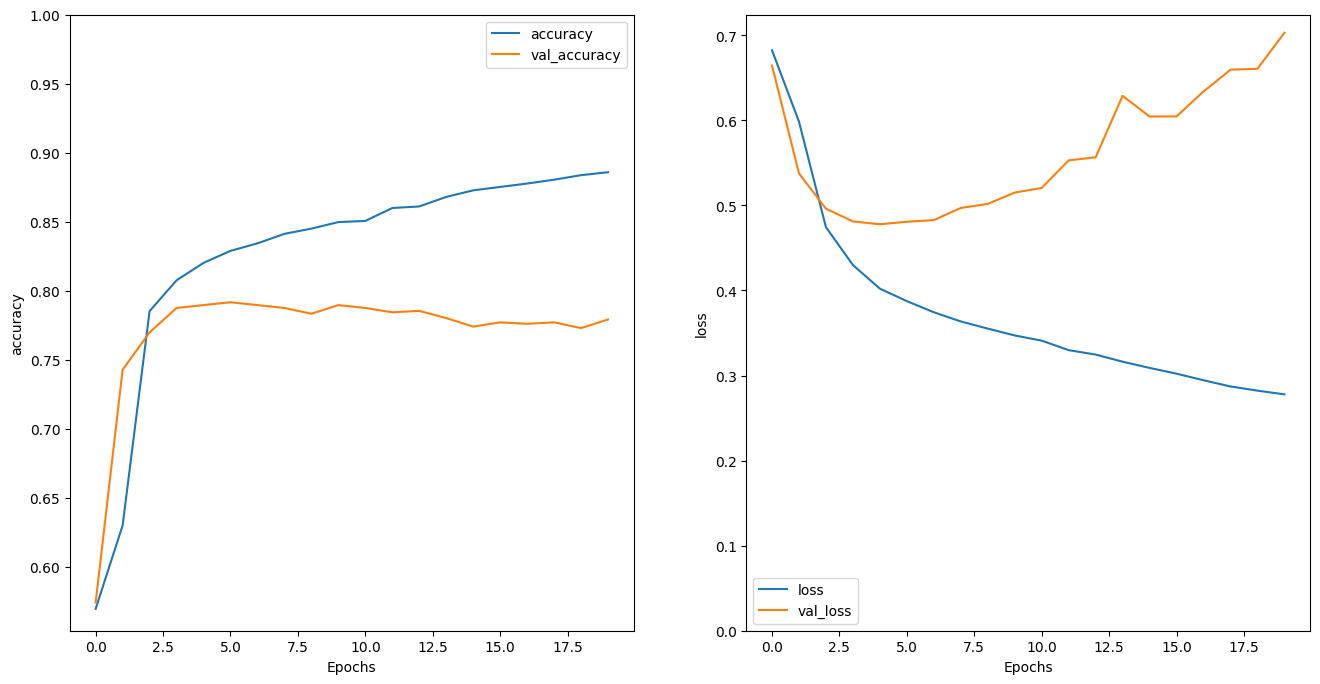

In [50]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

In [54]:
model.predict(np.array(["Help me there is an earthquake. SOS!"]))

1/1 [==============================] - 0s 8ms/step


array([[0.9244265]], dtype=float32)

In [55]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='softmax'),
    tf.keras.layers.Dense(1)
])

In [56]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [57]:
history = model.fit(train_dataset, epochs=20,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/20


2023-07-08 00:17:43.395260: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/ReverseV2_grad/ReverseV2/ReverseV2/axis' with dtype int32 and shape [1]
	 [[{{node gradients/ReverseV2_grad/ReverseV2/ReverseV2/axis}}]]
2023-07-08 00:17:44.160927: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/ReverseV2_grad/ReverseV2/ReverseV2/axis' with dtype int32 and shape [1]
	 [[{{node gradients/ReverseV2_grad/ReverseV2/ReverseV2/axis}}]]


191/191 [==============================] - 5s 16ms/step - loss: 0.6912 - accuracy: 0.5695 - val_loss: 0.6888 - val_accuracy: 0.5740
Epoch 2/20
191/191 [==============================] - 2s 12ms/step - loss: 0.6800 - accuracy: 0.5695 - val_loss: 0.6687 - val_accuracy: 0.5740
Epoch 3/20
191/191 [==============================] - 2s 12ms/step - loss: 0.6546 - accuracy: 0.5695 - val_loss: 0.6452 - val_accuracy: 0.5740
Epoch 4/20
191/191 [==============================] - 2s 13ms/step - loss: 0.6306 - accuracy: 0.5695 - val_loss: 0.6287 - val_accuracy: 0.5740
Epoch 5/20
191/191 [==============================] - 2s 13ms/step - loss: 0.6110 - accuracy: 0.5695 - val_loss: 0.6207 - val_accuracy: 0.5740
Epoch 6/20
191/191 [==============================] - 2s 13ms/step - loss: 0.5985 - accuracy: 0.5695 - val_loss: 0.6132 - val_accuracy: 0.5740
Epoch 7/20
191/191 [==============================] - 2s 13ms/step - loss: 0.5884 - accuracy: 0.5695 - val_loss: 0.6069 - val_accuracy: 0.5740
Epoch 8/20

In [58]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

48/48 [==============================] - 0s 4ms/step - loss: 0.5579 - accuracy: 0.7722
Test Loss: 0.5578786134719849
Test Accuracy: 0.7721602320671082


(0.0, 0.7003763109445572)

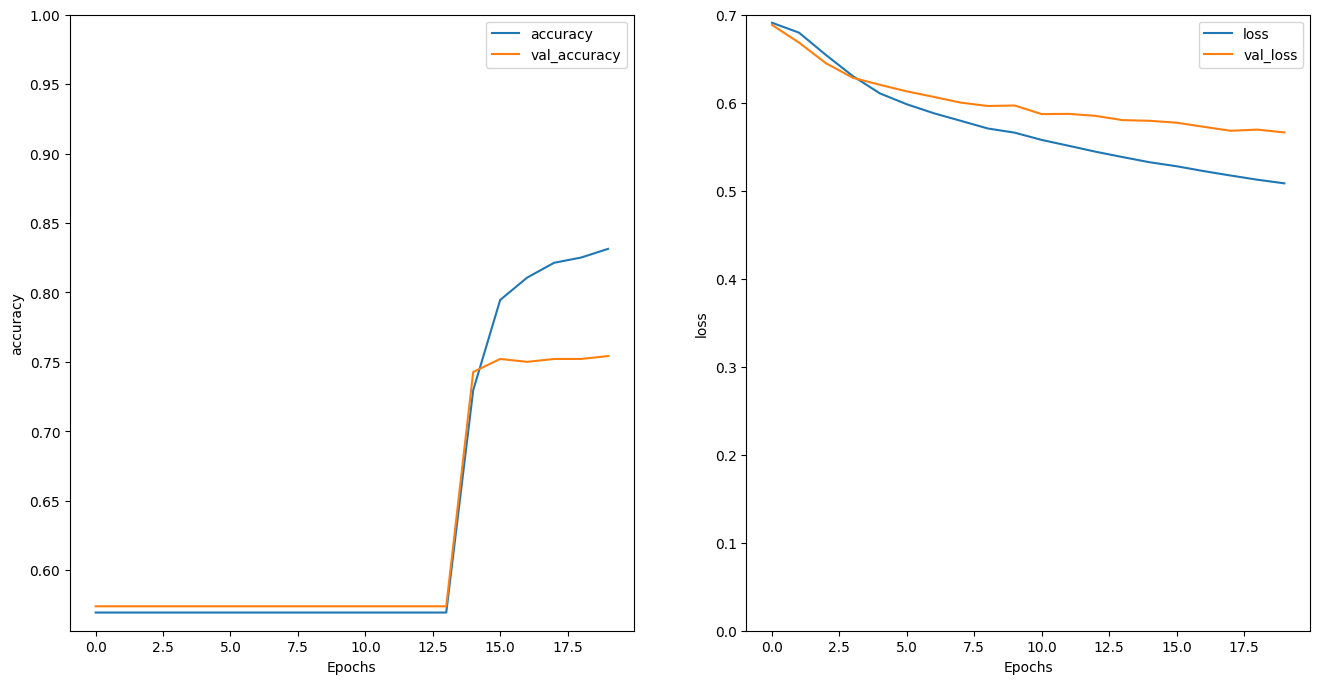

In [59]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

Epoch 1/20


2023-07-08 00:36:40.164380: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/ReverseV2_grad/ReverseV2/ReverseV2/axis' with dtype int32 and shape [1]
	 [[{{node gradients/ReverseV2_grad/ReverseV2/ReverseV2/axis}}]]
2023-07-08 00:36:41.418796: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/ReverseV2_grad/ReverseV2/ReverseV2/axis' with dtype int32 and shape [1]
	 [[{{node gradients/ReverseV2_grad/ReverseV2/ReverseV2/axis}}]]


191/191 [==============================] - 6s 16ms/step - loss: 0.5291 - accuracy: 0.7309 - val_loss: 0.5197 - val_accuracy: 0.7766
Epoch 2/20
191/191 [==============================] - 2s 13ms/step - loss: 0.4046 - accuracy: 0.8192 - val_loss: 0.5500 - val_accuracy: 0.7469
Epoch 3/20
191/191 [==============================] - 2s 13ms/step - loss: 0.3615 - accuracy: 0.8399 - val_loss: 0.5431 - val_accuracy: 0.7578
Epoch 4/20
191/191 [==============================] - 2s 13ms/step - loss: 0.3176 - accuracy: 0.8654 - val_loss: 0.5904 - val_accuracy: 0.7547
Epoch 5/20
191/191 [==============================] - 2s 13ms/step - loss: 0.2679 - accuracy: 0.8878 - val_loss: 0.6768 - val_accuracy: 0.7422
Epoch 6/20
191/191 [==============================] - 2s 13ms/step - loss: 0.2359 - accuracy: 0.9031 - val_loss: 0.8500 - val_accuracy: 0.7437
Epoch 7/20
191/191 [==============================] - 2s 13ms/step - loss: 0.1995 - accuracy: 0.9223 - val_loss: 0.8444 - val_accuracy: 0.7312
Epoch 8/20

(0.0, 2.2553576905280353)

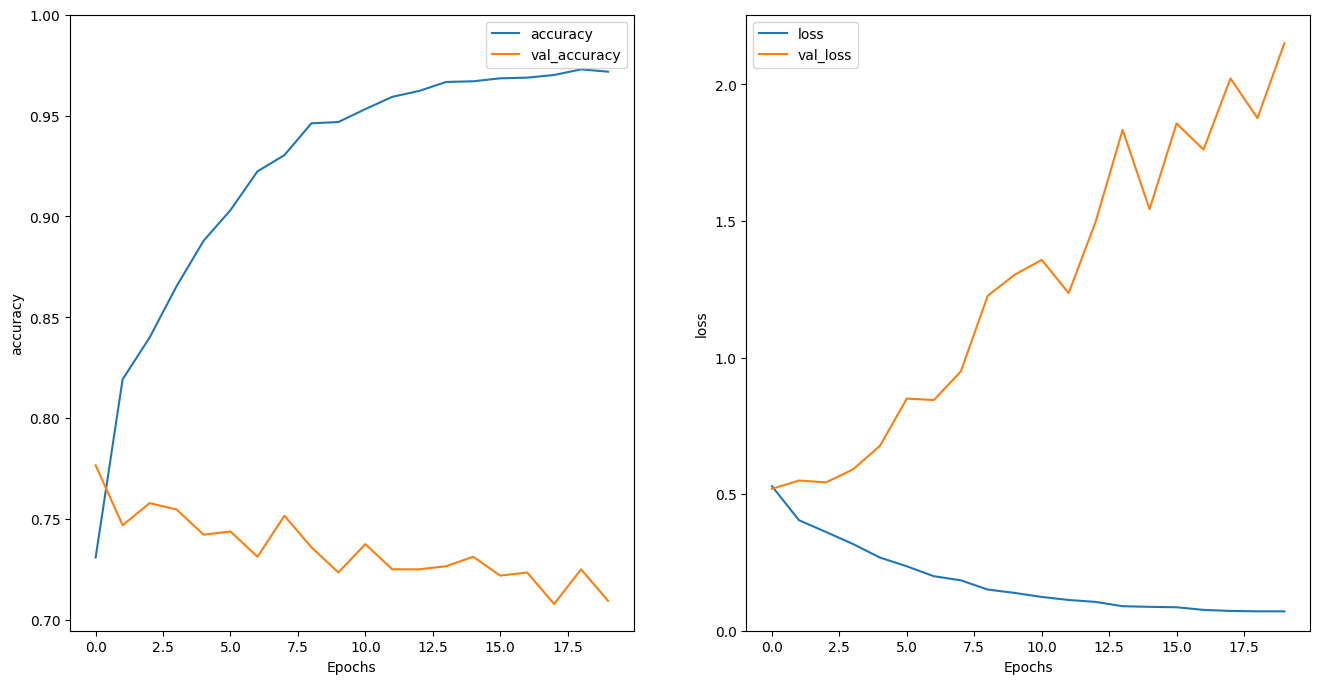

In [68]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(16),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-3),
              metrics=['accuracy'])

history = model.fit(train_dataset, epochs=20,
                    validation_data=test_dataset,
                    validation_steps=20)

test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

In [69]:
model.predict(np.array(["Help me there is an earthquake. SOS!"]))

1/1 [==============================] - 1s 597ms/step


array([[0.47606352]], dtype=float32)

In [35]:
kaggle_test_df = pd.read_csv("data/test.csv")

In [36]:
kaggle_test_df['clean_text'] = kaggle_test_df['text'].apply(lambda x: remove_urls(x))

### Stacking more layers to model

In [40]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(len(encoder.get_vocabulary()), 64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])


In [41]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/10


/home/light/anaconda3/envs/unsuper/lib/python3.9/site-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-07-08 01:10:56.887110: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/ReverseV2_grad/ReverseV2/ReverseV2/axis' with dtype int32 and shape [1]
	 [[{{node gradients/ReverseV2_grad/ReverseV2/ReverseV2/axis}}]]
2023-07-08 01:10:57.082079: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/ReverseV2_g

191/191 [==============================] - 14s 44ms/step - loss: 0.6828 - accuracy: 0.5722 - val_loss: 0.6642 - val_accuracy: 0.6052
Epoch 2/10
191/191 [==============================] - 7s 34ms/step - loss: 0.5746 - accuracy: 0.7332 - val_loss: 0.5176 - val_accuracy: 0.7833
Epoch 3/10
191/191 [==============================] - 7s 34ms/step - loss: 0.4637 - accuracy: 0.8077 - val_loss: 0.4898 - val_accuracy: 0.7906
Epoch 4/10
191/191 [==============================] - 7s 35ms/step - loss: 0.4264 - accuracy: 0.8281 - val_loss: 0.4869 - val_accuracy: 0.7917
Epoch 5/10
191/191 [==============================] - 7s 35ms/step - loss: 0.3996 - accuracy: 0.8399 - val_loss: 0.4939 - val_accuracy: 0.7979
Epoch 6/10
191/191 [==============================] - 7s 35ms/step - loss: 0.3848 - accuracy: 0.8506 - val_loss: 0.5012 - val_accuracy: 0.7885
Epoch 7/10
191/191 [==============================] - 7s 35ms/step - loss: 0.3721 - accuracy: 0.8548 - val_loss: 0.5093 - val_accuracy: 0.8000
Epoch 8/1

 1/48 [..............................] - ETA: 0s - loss: 0.4959 - accuracy: 0.7812

48/48 [==============================] - 0s 10ms/step - loss: 0.5335 - accuracy: 0.7814
Test Loss: 0.5334557294845581
Test Accuracy: 0.7813525795936584


(0.0, 0.700248521566391)

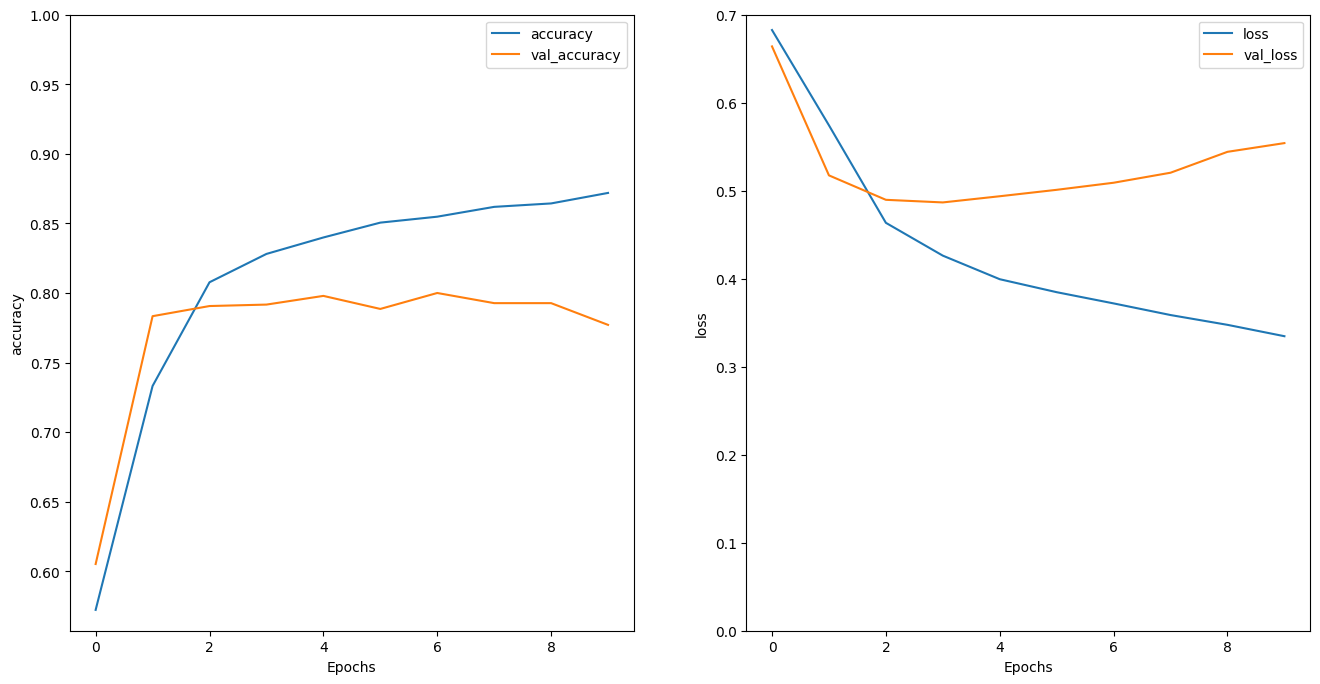

In [44]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

### Model Evaluation and analysis
I notice that changing activation function alone doesn't help much in the model. So, I stacked more layers adn the loss curve is not a bit reasonable. Of course, it is not the best. In the era of today's deep learning, bigger models mean better. So, if I have more resources, I would definitely experiment with more and more layers.

### Conclusion
In the future, I would clean the data more. The quality of data is the most important part of the deep learning. However, it will be painstaking to clean the data. And, I can experiment with large language model like BERT to extract embeddings and make the result better. LLMs have good understanding of the language so I believe that approach will likely to work better.

In [45]:
predictions = model.predict(kaggle_test_df['clean_text'])

102/102 [==============================] - 3s 9ms/step


In [46]:
predictions[:3]

array([[0.7057711 ],
       [0.66290337],
       [0.90586025]], dtype=float32)

In [48]:
import csv

csv_file = 'new_submission.csv'

# Save the array of floats as CSV with headers using the csv module
with open(csv_file, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['id', 'target'])  # Write column headers
    for i, val in enumerate(predictions):
        idx = kaggle_test_df.iloc[i]['id']
        binary_prediction = 1 if val > 0.5 else 0
        writer.writerow([idx, binary_prediction])

### Refercences
Official RNN text classification tutorial by Tensorflow<br>
https://www.tensorflow.org/text/tutorials/text_classification_rnn<br><br>

Kaggle Discussion - Best NLP Kernels For Beginners<br>
https://www.kaggle.com/competitions/nlp-getting-started/discussion/134890